In [1]:
from pytransit.lpf.hubblelpf import HubbleLPF
from pytransit.utils.hubble import read_hubble_spoc
import numpy as np
import os

In [2]:
planet_name = "WASP-121 b"
dir = os.path.join("data", planet_name)

In [3]:
df_lc, df_par = read_hubble_spoc(dir)

# HST

In [4]:
npop = 30
mcmc_repeats = 4

lpf = HubbleLPF(
    name=planet_name,
    times=df_lc.time.values[1:],
    fluxes=df_lc.flux.values[1:],
    errors=df_lc.flux_err.values[1:],
    data_scan=df_lc.data_scan.values[1:],
    datadir=dir,
    bldur=0.8,
)

In [5]:
zero_epoch = lpf.lc.t0
period = lpf.lc.p
flux = lpf.lc.flux

In [6]:
lpf.set_prior("tc", "NP", zero_epoch, 0.05)  # Wide normal prior on the transit center
lpf.set_prior("p", "NP", period, 1e-4)  # Wide normal prior on the orbital period
lpf.set_prior("rho", "UP", 0.5, 1.0)  # Uniform prior on the stellar density
lpf.set_prior("k2", "UP", 0.0, 0.2**2)  # Uniform prior on the area ratio
# lpf.set_prior("gp_ln_in", "UP", -2, 1)  # Uniform prior on the GP input scale

# HST part
lpf.set_prior("r_a1", "UP", -10, 10)  # long term ramp - 1st order
lpf.set_prior("r_a2", "UP", -2, 2)  # long term ramp - 2st order
lpf.set_prior("r_b1", "UP", -10, 10)  # short term ramp - amplitude
lpf.set_prior("mor_b1", "UP", -10, 10)  # short term mid-orbit ramp - amplitude
lpf.set_prior("for_b1", "UP", -10, 10)  # short term first-orbit ramp - amplitude
lpf.set_prior("r_b2", "UP", -10, 10)  # short term ramp - decay
lpf.set_prior("mor_b2", "UP", -10, 10)  # short term mid-orbit ramp - decay
lpf.set_prior("for_b2", "UP", -10, 10)  # short term first-orbit ramp - decay
lpf.set_prior(
    "norm_f",
    "UP",
    np.log10(np.median(flux)) - 1,
    np.log10(np.median(flux)) + 1,
)  # short term first-orbit ramp - decay
lpf.set_prior(
    "norm_r",
    "UP",
    np.log10(np.median(flux)) - 1,
    np.log10(np.median(flux)) + 1,
)  # short term first-orbit ramp - decay

In [7]:
lpf.print_parameters(columns=1)

  0 |G| tc             N(μ = 2457424.8866479923, σ = 0.05)      [    -inf ..      inf]
  1 |G| p              N(μ = 1.274924762, σ = 0.0001)           [    0.00 ..      inf]
  2 |G| rho            U(a = 0.5, b = 1.0)                      [    0.00 ..      inf]
  3 |G| b              U(a = 0.0, b = 1.0)                      [    0.00 ..     1.00]
  4 |P| k2             U(a = 0.0, b = 0.04000000000000001)      [    0.00 ..      inf]
  5 |P| q1_Hubble      U(a = 0, b = 1)                          [    0.00 ..     1.00]
  6 |P| q2_Hubble      U(a = 0, b = 1)                          [    0.00 ..     1.00]
  7 |G| r_a1           U(a = -10, b = 10)                       [    -inf ..      inf]
  8 |G| r_a2           U(a = -2, b = 2)                         [    -inf ..      inf]
  9 |G| r_b1           U(a = -10, b = 10)                       [    -inf ..      inf]
 10 |G| mor_b1         U(a = -10, b = 10)                       [    -inf ..      inf]
 11 |G| for_b1         U(a = -10, b = 10)  

Global optimisation:   0%|          | 0/800 [00:00<?, ?it/s]

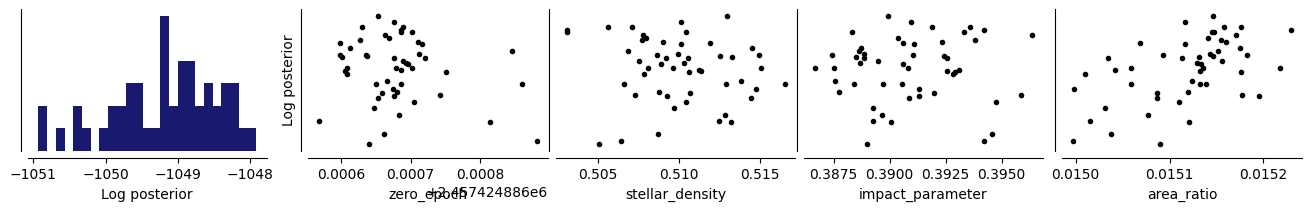

In [8]:
lpf.optimize_global(800, npop=50)

In [9]:
lpf.sample_mcmc(3000, thin=200, repeats=mcmc_repeats)

MCMC sampling:   0%|          | 0/4 [00:00<?, ?it/s]

Run 1/4:   0%|          | 0/3000 [00:00<?, ?it/s]

Run 2/4:   0%|          | 0/3000 [00:00<?, ?it/s]

Run 3/4:   0%|          | 0/3000 [00:00<?, ?it/s]

Run 4/4:   0%|          | 0/3000 [00:00<?, ?it/s]

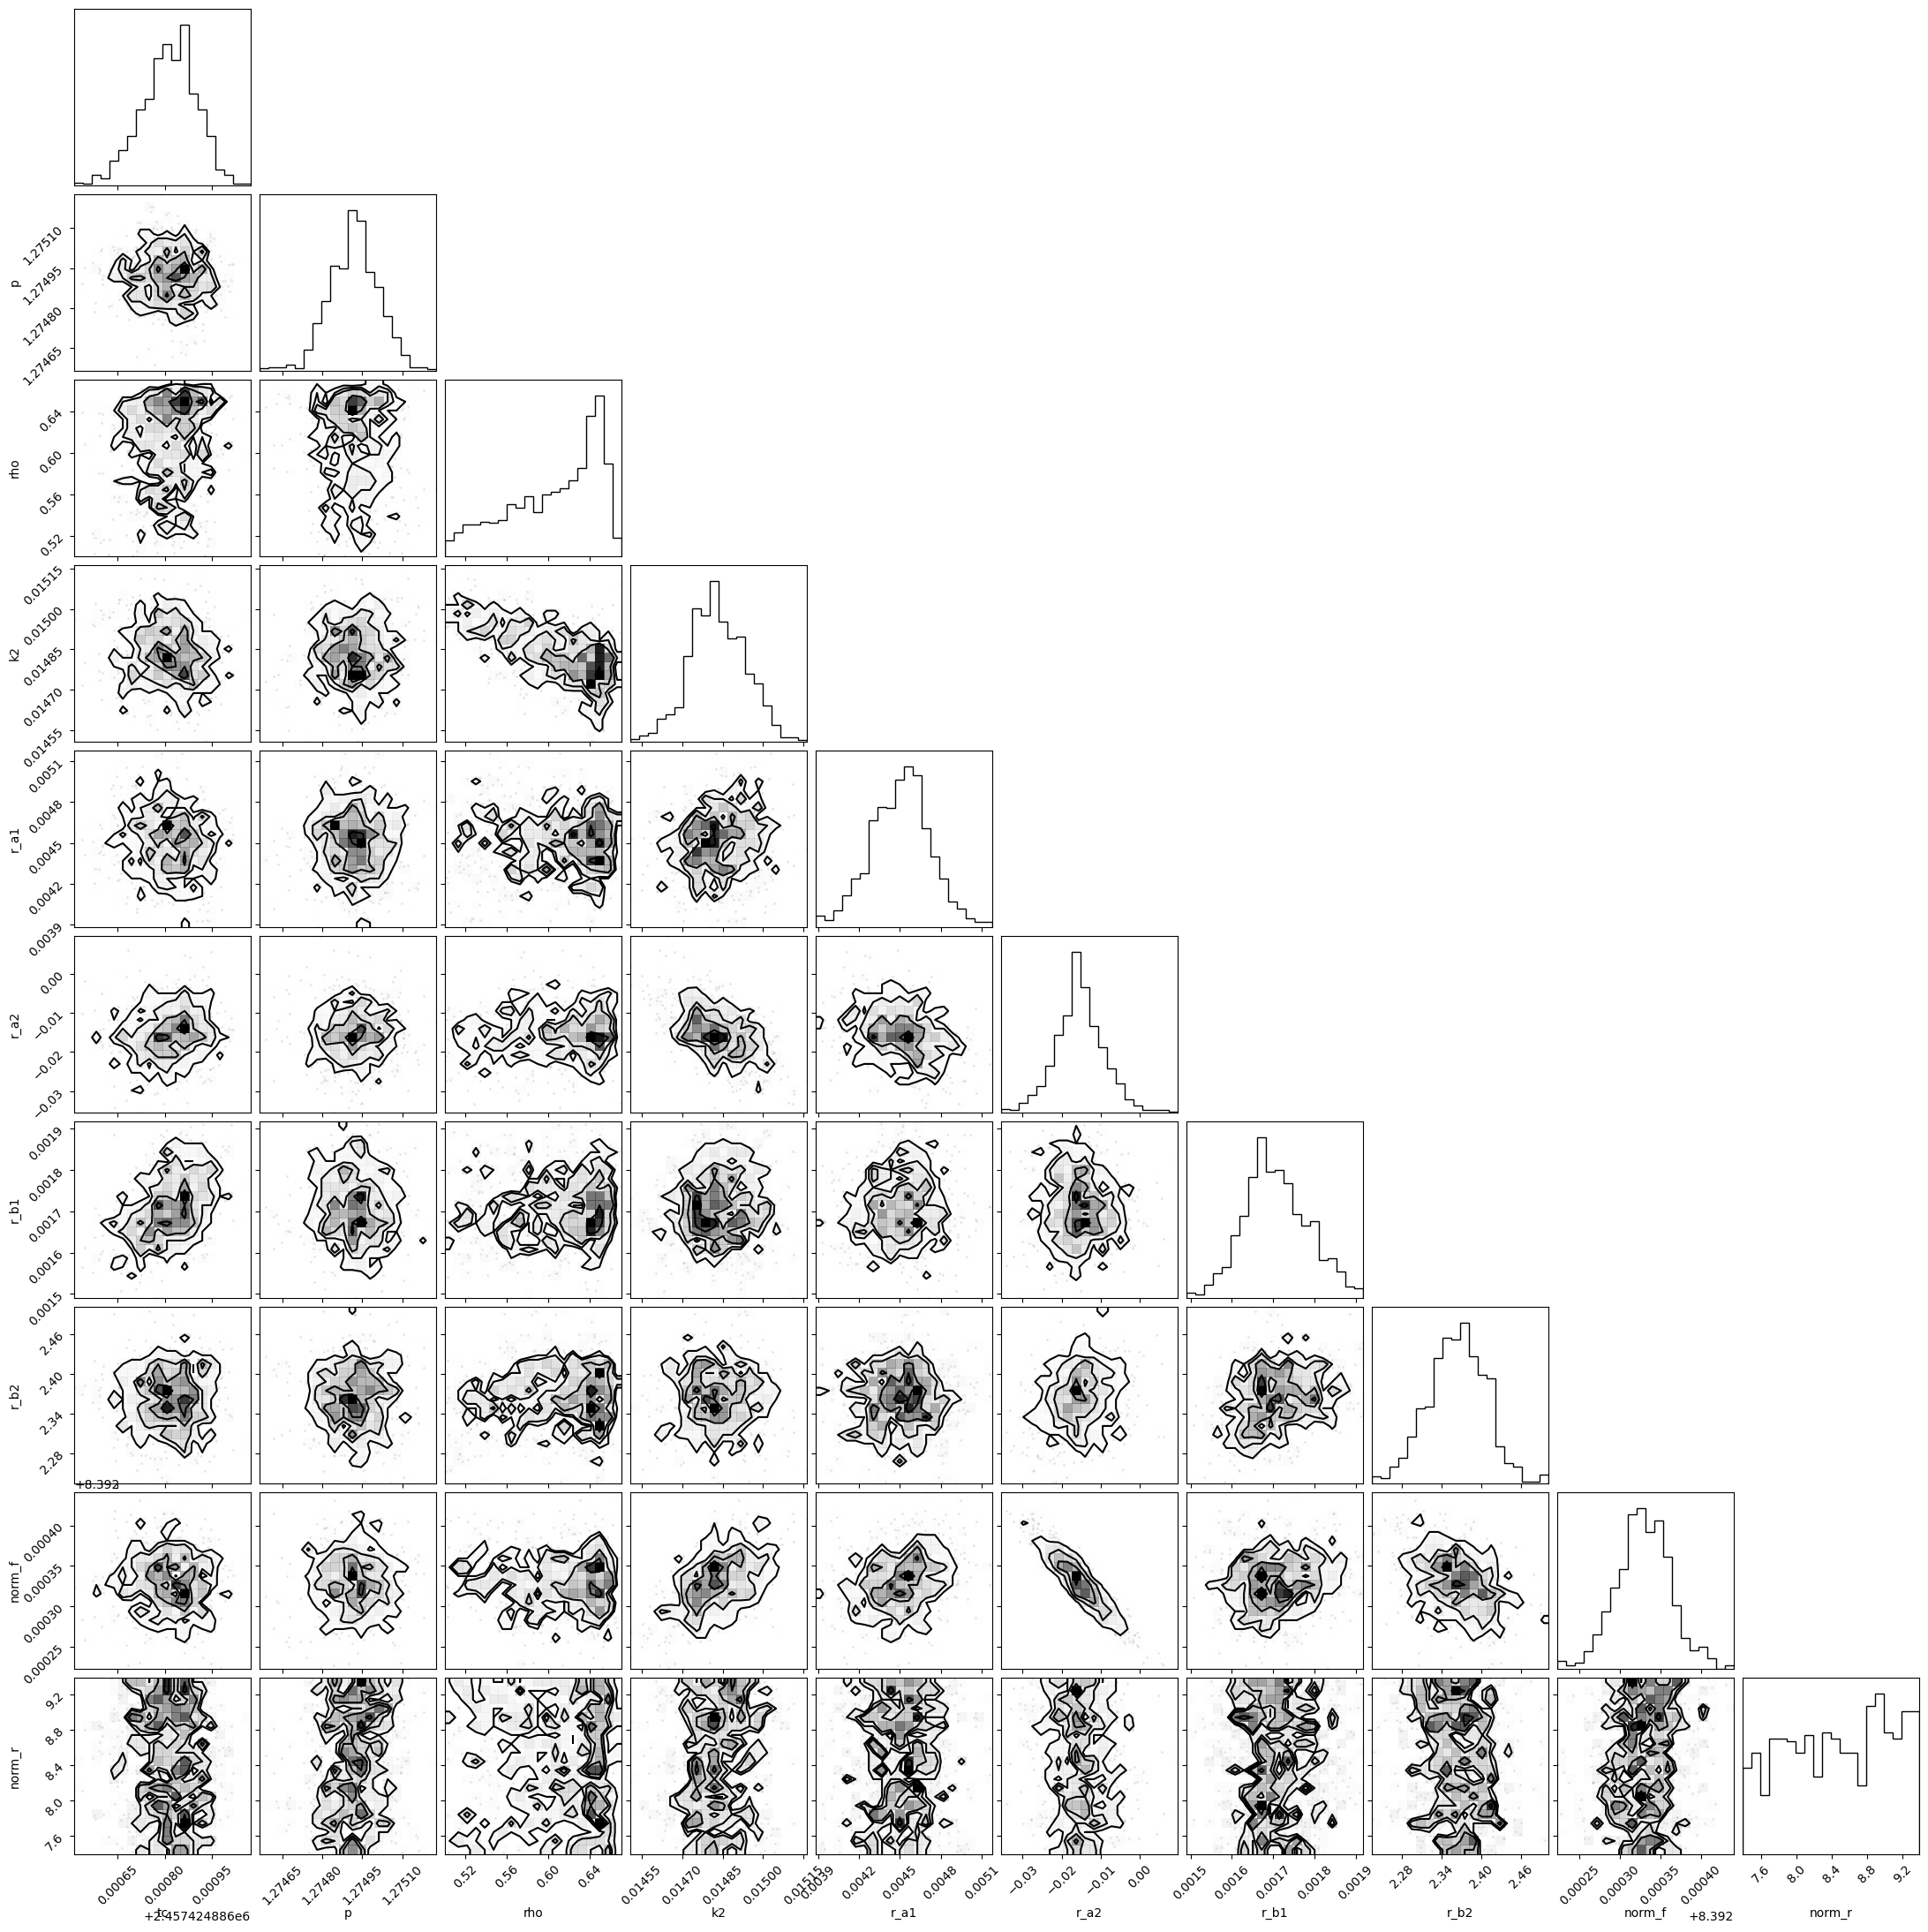

In [10]:
fig = lpf.plot_basic_posteriors()

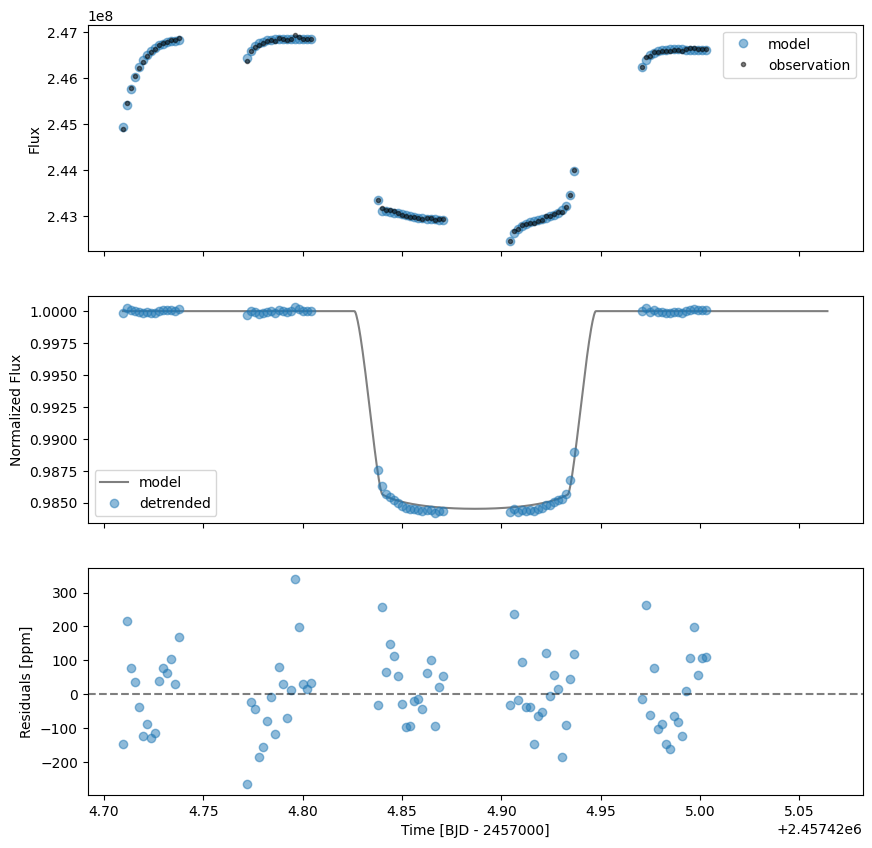

In [11]:
fig, axes = lpf.plot_results()